In [1]:
import scanpy as sc
import scvi
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import data from Preprocessing

In [2]:
# Load scVI-markers
path = os.getcwd()
path = os.path.dirname(path)
path = os.path.dirname(path)
path = os.path.join(path, 'Story')

scVImarkers = pd.read_csv(os.path.join(path, 'scvi_markers.csv'), index_col=0)

# Load Comparison results
comparison = pd.read_csv(os.path.join(path, 'differential_expression_comparison.csv'), index_col=0)

# Load Differential expression results
DE = pd.read_csv(os.path.join(path, 'differential_expression.csv'), index_col=0)

In [3]:
scVImarkers # DE data comparing single timepoint to all others

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9774,0.0226,3.766946,4.760337e-06,0.000141,0.0,0.25,-4.235498,-4.289593,2.643188,...,0.000000,0.063098,0.0000,0.1495,0.000000,0.578051,True,00 vs Rest,0,Rest
KLF15,0.9748,0.0252,3.655388,4.696343e-05,0.000368,0.0,0.25,-2.684356,-2.729996,1.404631,...,0.019409,0.249562,0.0550,0.4655,0.194108,2.330235,True,00 vs Rest,0,Rest
AC010980.2,0.9740,0.0260,3.623314,5.479002e-07,0.000012,0.0,0.25,-3.886126,-3.907930,2.678749,...,0.000000,0.004264,0.0000,0.0130,0.000000,0.037309,True,00 vs Rest,0,Rest
F3,0.9716,0.0284,3.532555,1.573912e-05,0.000108,0.0,0.25,-2.541513,-2.531828,1.446233,...,0.009535,0.071599,0.0300,0.1730,0.095439,0.661067,True,00 vs Rest,0,Rest
IP6K3,0.9708,0.0292,3.503951,1.324234e-06,0.000035,0.0,0.25,-3.981581,-4.020726,2.590519,...,0.000000,0.024162,0.0000,0.0685,0.000000,0.214588,True,00 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC40A1,0.3280,0.6720,-0.717245,1.613502e-03,0.001691,0.0,0.25,-0.066368,-0.066750,0.255060,...,1.641475,1.684301,0.9900,0.9890,15.434623,16.189192,False,18 vs Rest,18,Rest
HNRNPA2B1,0.3124,0.6876,-0.788923,2.551079e-03,0.002643,0.0,0.25,-0.050566,-0.053423,0.252075,...,3.195616,3.210751,1.0000,1.0000,30.240833,31.264622,False,18 vs Rest,18,Rest
NAA35,0.3040,0.6960,-0.828322,1.354779e-04,0.000140,0.0,0.25,-0.046967,-0.044841,0.241426,...,0.131859,0.140552,0.3575,0.3675,1.219128,1.344608,False,18 vs Rest,18,Rest
TM9SF3,0.2640,0.7360,-1.025281,1.424066e-03,0.001431,0.0,0.25,-0.005862,-0.003837,0.222519,...,1.428848,1.379883,0.9950,0.9870,13.349762,13.249618,False,18 vs Rest,18,Rest


In [4]:
DE # all DE data with comparisons from timepoint to timepoint

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PCDH17,0.9576,0.0424,3.117282,3.352293e-07,7.596763e-07,0.0,0.25,-1.070070,-1.192768,3.542663,...,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,True,00 vs 01,0,1
FRZB,0.9508,0.0492,2.961410,1.735962e-06,2.411950e-06,0.0,0.25,-0.063396,-0.206574,4.326629,...,0.001434,0.000700,0.0050,0.0025,0.013134,0.006153,True,00 vs 01,0,1
MYT1,0.9474,0.0526,2.891005,2.775388e-06,1.326400e-06,0.0,0.25,1.311500,1.284390,3.581871,...,0.001911,0.000706,0.0050,0.0025,0.019700,0.008022,True,00 vs 01,0,1
WDR38,0.9470,0.0530,2.883007,7.590724e-07,1.516840e-06,0.0,0.25,-0.482032,-0.830897,3.812057,...,0.000489,0.000000,0.0025,0.0000,0.003974,0.000000,True,00 vs 01,0,1
AC090607.2,0.9464,0.0536,2.871116,2.949553e-06,4.882424e-06,0.0,0.25,-0.181040,-0.598516,4.119760,...,0.002370,0.003650,0.0050,0.0100,0.020847,0.032130,False,00 vs 01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPTSSA,0.2954,0.7046,-0.869300,1.071080e-03,9.975969e-04,0.0,0.25,0.103071,0.101878,0.221729,...,1.162118,1.023609,0.9675,0.9625,10.842666,9.441485,False,18 vs 08,18,8
NAA35,0.2832,0.7168,-0.928643,1.354971e-04,1.387701e-04,0.0,0.25,-0.033945,-0.033859,0.236661,...,0.131859,0.136317,0.3575,0.3775,1.219128,1.241520,False,18 vs 08,18,8
TNK2,0.2740,0.7260,-0.974422,5.368519e-04,5.242131e-04,0.0,0.25,0.035571,0.036153,0.229947,...,0.481279,0.495225,0.8050,0.8150,4.468597,4.578767,False,18 vs 08,18,8
TM9SF3,0.2584,0.7416,-1.054301,1.430232e-03,1.440781e-03,0.0,0.25,-0.010463,-0.009482,0.222094,...,1.428848,1.431067,0.9950,0.9900,13.349762,13.264909,False,18 vs 08,18,8


In [5]:
comparison # mean log fold change from timepoint to timepoint

,01 vs 02,01 vs 18,04 vs 18,00 vs 02,04 vs 08,08 vs 18,01 vs 08,02 vs 18,02 vs 04,00 vs 01,00 vs 08,02 vs 08,01 vs 04,00 vs 18,00 vs 04
GPRIN3,-0.007921,0.822442,0.819484,-0.440350,0.321475,0.519497,0.344748,0.907614,0.044157,-0.459826,-0.074179,0.391268,0.000802,0.437439,-0.371480
UGT3A2,-0.120588,0.803702,0.580125,-0.226946,0.233786,0.380544,0.483003,0.904645,0.351877,-0.127524,0.339838,0.579228,0.249299,0.758454,0.126599
PGGHG,0.116500,0.165142,-0.122087,0.431179,0.015594,-0.150909,0.273378,0.013896,0.137528,0.317225,0.586852,0.140887,0.274668,0.459096,0.577133
SH3BGR,-0.018409,0.499372,0.246731,0.171296,0.138481,0.107383,0.409545,0.532245,0.296846,0.192358,0.592657,0.426158,0.295913,0.689216,0.458729
TRPV1,0.278066,0.316117,0.032302,0.386547,0.037542,-0.001151,0.307793,0.051051,0.000121,0.124034,0.437105,0.045622,0.260447,0.447353,0.408595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAM13C,0.257927,1.611871,0.769438,0.654235,0.315162,0.499047,1.185595,1.397278,0.653605,0.412918,1.579033,0.978636,0.902104,2.061021,1.306232
PXDC1,-0.149512,-0.342342,-0.182042,-0.302724,-0.053910,-0.126140,-0.219073,-0.175383,0.019333,-0.159450,-0.353081,-0.022227,-0.137923,-0.511933,-0.300381
KLHDC7A,0.221036,-0.234130,-0.408807,0.342361,-0.227722,-0.162574,-0.106998,-0.469973,-0.047845,0.138529,0.068727,-0.267373,0.149949,-0.125107,0.300090
IFNGR1,-0.056166,-0.682571,-0.528150,-0.091356,-0.313401,-0.186522,-0.476205,-0.640200,-0.105929,-0.029248,-0.501398,-0.418340,-0.147149,-0.699708,-0.195010


# Grouping Genes

## Supervised Approach

Simple Up or Down over from tp0 to tpfinal

In [42]:
inc_0018 = comparison[comparison['00 vs 18'] > 0.5]
dec_0018 = comparison[comparison['00 vs 18'] < -0.5]

In [43]:
# shits and giggles
import umap

reducer = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2)

embedding = reducer.fit_transform(inc_0018[:].to_numpy())


Text(0.5, 1.0, 'UMAP projection of the Log Fold Changes dataset')

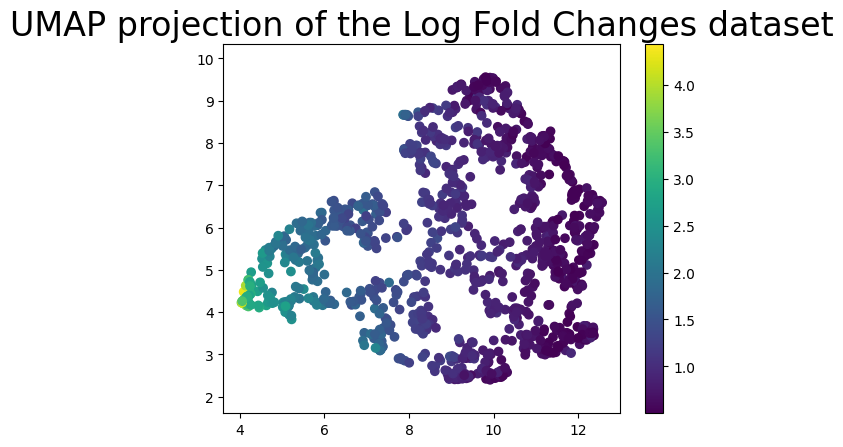

In [44]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = inc_0018.loc[:, '00 vs 18'])
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Log Fold Changes dataset', fontsize=24)

In [45]:
reducer = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2)

embedding = reducer.fit_transform(dec_0018[:].to_numpy())

Text(0.5, 1.0, 'UMAP projection of the Log Fold Changes dataset')

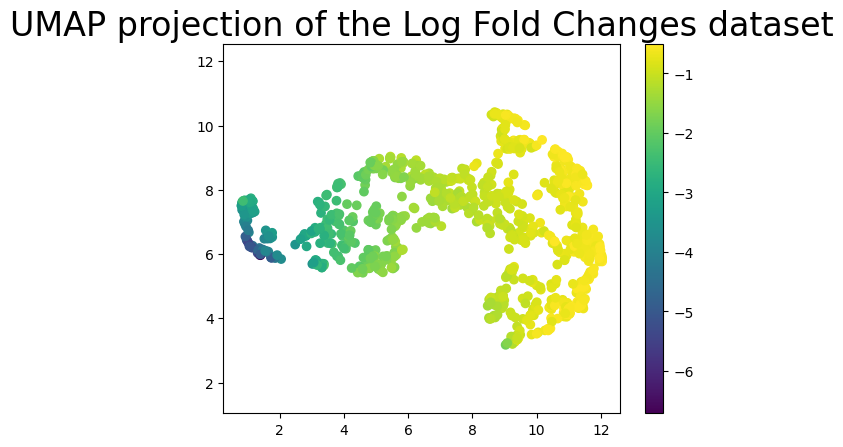

In [46]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = dec_0018.loc[:, '00 vs 18'])
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Log Fold Changes dataset', fontsize=24)

Gene Enrichment for simple increase or decrease

In [47]:
inc_0018_enrichment = sc.queries.enrich(list(inc_0018.index), org="hsapiens")

In [48]:
inc_0018_enrichment[inc_0018_enrichment['source'] == 'WP']

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
112,WP,WP:WP4331,Neovascularisation processes,0.002582,True,Neovascularisation processes,37,338,9,8286,0.026627,0.243243,query_1,[WP:000000]
182,WP,WP:WP5213,Amino acid metabolism in triple negative breas...,0.017551,True,Amino acid metabolism in triple negative breas...,7,338,4,8286,0.011834,0.571429,query_1,[WP:000000]
219,WP,WP:WP5083,Neuroinflammation and glutamatergic signaling,0.035700,True,Neuroinflammation and glutamatergic signaling,140,338,16,8286,0.047337,0.114286,query_1,[WP:000000]
226,WP,WP:WP2840,Hair follicle development cytodifferentiation ...,0.039929,True,Hair follicle development cytodifferentiation ...,87,338,12,8286,0.035503,0.137931,query_1,[WP:000000]


In [49]:
set(inc_0018_enrichment['source'])

{'CORUM',
 'GO:BP',
 'GO:CC',
 'GO:MF',
 'HP',
 'HPA',
 'KEGG',
 'MIRNA',
 'REAC',
 'TF',
 'WP'}

In [50]:
dec_0018_enrichment = sc.queries.enrich(list(dec_0018.index), org="hsapiens")

In [51]:
dec_0018_enrichment

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0048856,anatomical structure development,7.330126e-24,True,"""The biological process whose specific outcome...",5899,680,321,21031,0.472059,0.054416,query_1,[GO:0032502]
1,GO:BP,GO:0032502,developmental process,2.170689e-23,True,"""A biological process whose specific outcome i...",6453,680,340,21031,0.500000,0.052689,query_1,[GO:0008150]
2,GO:BP,GO:0007275,multicellular organism development,1.867746e-20,True,"""The biological process whose specific outcome...",4643,680,264,21031,0.388235,0.056860,query_1,"[GO:0032501, GO:0048856]"
3,GO:BP,GO:0032501,multicellular organismal process,6.151956e-20,True,"""Any biological process, occurring at the leve...",7669,680,373,21031,0.548529,0.048637,query_1,[GO:0008150]
4,GO:BP,GO:0009888,tissue development,2.562546e-19,True,"""The process whose specific outcome is the pro...",2010,680,149,21031,0.219118,0.074129,query_1,[GO:0048856]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,WP,WP:WP2849,Hematopoietic stem cell differentiation,4.806352e-02,True,Hematopoietic stem cell differentiation,57,382,10,8286,0.026178,0.175439,query_1,[WP:000000]
561,REAC,REAC:R-HSA-9027283,Erythropoietin activates STAT5,4.889742e-02,True,Erythropoietin activates STAT5,7,444,4,10842,0.009009,0.571429,query_1,[REAC:R-HSA-9006335]
562,GO:MF,GO:0001067,transcription regulatory region nucleic acid b...,4.935569e-02,True,"""Binding to a nucleic acid region that regulat...",1482,702,79,20212,0.112536,0.053306,query_1,[GO:0003676]
563,GO:CC,GO:0098552,side of membrane,4.950506e-02,True,"""A cellular component consisting of one leafle...",721,701,42,22097,0.059914,0.058252,query_1,"[GO:0016020, GO:0110165]"


In [67]:
union_0018 = pd.DataFrame(columns=['native', 'name', 'source', 'inc_intersection', 'dec_intersection'])
# Get the intersection of native values
intersection = set(inc_0018_enrichment['native']).intersection(set(dec_0018_enrichment['native']))

for i in intersection:
    union_0018.loc[len(union_0018.index)] = {'native': i, 
                                             'name': inc_0018_enrichment[inc_0018_enrichment['native'] == i]['name'].values[0],
                                             'source': inc_0018_enrichment[inc_0018_enrichment['native'] == i]['source'].values[0],
                                             'inc_intersection': int(inc_0018_enrichment[inc_0018_enrichment['native'] == i]['intersection_size']), 
                                             'dec_intersection': int(dec_0018_enrichment[dec_0018_enrichment['native'] == i]['intersection_size'])}


/tmp/ipykernel_124134/1044732054.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'inc_intersection': int(inc_0018_enrichment[inc_0018_enrichment['native'] == i]['intersection_size']),
/tmp/ipykernel_124134/1044732054.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'dec_intersection': int(dec_0018_enrichment[dec_0018_enrichment['native'] == i]['intersection_size'])}
/tmp/ipykernel_124134/1044732054.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'inc_intersection': int(inc_0018_enrichment[inc_0018_enrichment['native'] == i]['intersection_size']),
/tmp/ipykernel_124134/1044732054.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. 

In [78]:
union_0018[union_0018['source'] == 'REAC']

,native,name,source,inc_intersection,dec_intersection
110,REAC:R-HSA-162582,Signal Transduction,REAC,127,144


In [69]:
set(union_0018['source'])

{'GO:BP', 'GO:CC', 'GO:MF', 'MIRNA', 'REAC', 'TF'}

In [39]:
comparisons = [
    '00 vs 01', '00 vs 02', '00 vs 04', '00 vs 08', '00 vs 18',
    '01 vs 02', '01 vs 04', '01 vs 08', '01 vs 18',
    '02 vs 04', '02 vs 08', '02 vs 18',
    '04 vs 08', '04 vs 18',
    '08 vs 18'
]

col = ['gene']
col.extend([f'{c}_lfc_mean' for c in comparisons])
col.extend([f'{c}_lfc_median' for c in comparisons])
col.extend([f'{c}_lfc_std' for c in comparisons])

simplifiedDE = pd.DataFrame(columns=col, index=list(set(DE.index)))
n = 0
for i in list(set(DE.index)):
    for c in comparisons:
        simplifiedDE.loc[i, f'{c}_lfc_mean'] = DE[DE['comparison'] == c].loc[i]['lfc_mean']
        simplifiedDE.loc[i, f'{c}_lfc_median'] = DE[DE['comparison'] == c].loc[i]['lfc_median']
        simplifiedDE.loc[i, f'{c}_lfc_std'] =  DE[DE['comparison'] == c].loc[i]['lfc_std']
        n += 1
        if n % 100 == 0:
            print(n)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [40]:
simplifiedDE.to_csv('simplifiedDE.csv')

In [41]:
simplifiedDE

,gene,00 vs 01_lfc_mean,00 vs 02_lfc_mean,00 vs 04_lfc_mean,00 vs 08_lfc_mean,00 vs 18_lfc_mean,01 vs 02_lfc_mean,01 vs 04_lfc_mean,01 vs 08_lfc_mean,01 vs 18_lfc_mean,...,01 vs 02_lfc_std,01 vs 04_lfc_std,01 vs 08_lfc_std,01 vs 18_lfc_std,02 vs 04_lfc_std,02 vs 08_lfc_std,02 vs 18_lfc_std,04 vs 08_lfc_std,04 vs 18_lfc_std,08 vs 18_lfc_std
CAHM,NaN,0.201901,0.358695,0.520118,0.490289,0.32823,0.149773,0.273948,0.269726,0.118876,...,1.191018,1.239503,1.249971,1.233861,1.12499,1.134914,1.105955,1.234761,1.207076,1.215989
MAP3K20,NaN,-0.331306,-0.364775,-0.494253,-0.377618,-0.336425,-0.038618,-0.180024,-0.07604,-0.02851,...,0.772645,0.826904,0.830582,0.844743,0.788819,0.803694,0.790915,0.841594,0.833032,0.845941
PLXDC2,NaN,-0.206998,-0.090486,-0.213486,-0.302267,-0.207683,0.11409,-0.0634,-0.137093,-0.008829,...,1.085088,1.094854,1.173584,1.125641,1.005117,1.075315,1.009767,1.065816,1.074883,1.100923
NECTIN4,NaN,0.061919,0.16406,0.13065,-0.014058,-0.111036,0.111578,0.064608,-0.071221,-0.159731,...,0.449569,0.476737,0.478219,0.466469,0.464685,0.449529,0.442825,0.498455,0.491781,0.489374
CYP4F22,NaN,-0.121163,-0.36688,-0.572806,-1.113496,-1.877456,-0.283075,-0.451326,-0.999648,-1.779525,...,0.90142,0.979663,1.05629,1.123122,0.952909,1.011019,1.062223,1.113927,1.17965,1.239192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLDN15,NaN,-0.097938,-0.168562,-0.261963,-0.296083,-0.329114,-0.067873,-0.160416,-0.215393,-0.241524,...,0.566672,0.571075,0.546904,0.541989,0.508094,0.489864,0.469872,0.483258,0.479898,0.459431
AC016727.1,NaN,0.258379,0.338665,0.491591,0.479374,0.6823,0.092785,0.246417,0.235277,0.414464,...,0.750429,0.797267,0.806881,0.804462,0.777949,0.787513,0.786625,0.835779,0.836439,0.867523
FAM43A,NaN,-0.149938,-0.090591,-0.356916,-0.91266,-1.587206,0.048675,-0.231343,-0.808953,-1.435404,...,0.91917,0.930504,0.986518,1.063758,0.91042,0.97647,1.021304,0.982626,1.041259,1.069207
CYP2E1,NaN,-0.067963,0.055335,0.075127,-0.019573,0.117389,0.128737,0.132663,0.050556,0.177772,...,0.606942,0.632778,0.663499,0.63241,0.5932,0.638968,0.604842,0.663346,0.628422,0.680924


In [33]:
len(list(set(DE.index)))

5000